# TensorFlow 指南
https://tensorflow.google.cn/guide/
    
* 高阶 API
    * Keras，用于构建和训练深度学习模型的 TensorFlow 高阶 API。
    * Eager Execution，一个以命令方式编写 TensorFlow 代码的 API，就像使用 NumPy 一样。
    * Estimator，一个高阶 API，可以提供已准备好执行大规模训练和生产的完全打包的模型。
    * 导入数据，简单的输入管道，用于将您的数据导入 TensorFlow 程序。

* Estimator
    * Estimator，了解如何将 Estimator 用于机器学习。
    * 预创建的 Estimator，预创建的 Estimator 的基础知识。
    * 检查点，保存训练进度并从您停下的地方继续。
    * 特征列，在不对模型做出更改的情况下处理各种类型的输入数据。
    * Estimator 的数据集，使用 tf.data 输入数据。
    * 创建自定义 Estimator，编写自己的 Estimator。

## 编程堆栈
在详细了解程序本身之前，我们先来了解编程环境。如下图所示，TensorFlow 提供一个包含多个 API 层的编程堆栈：

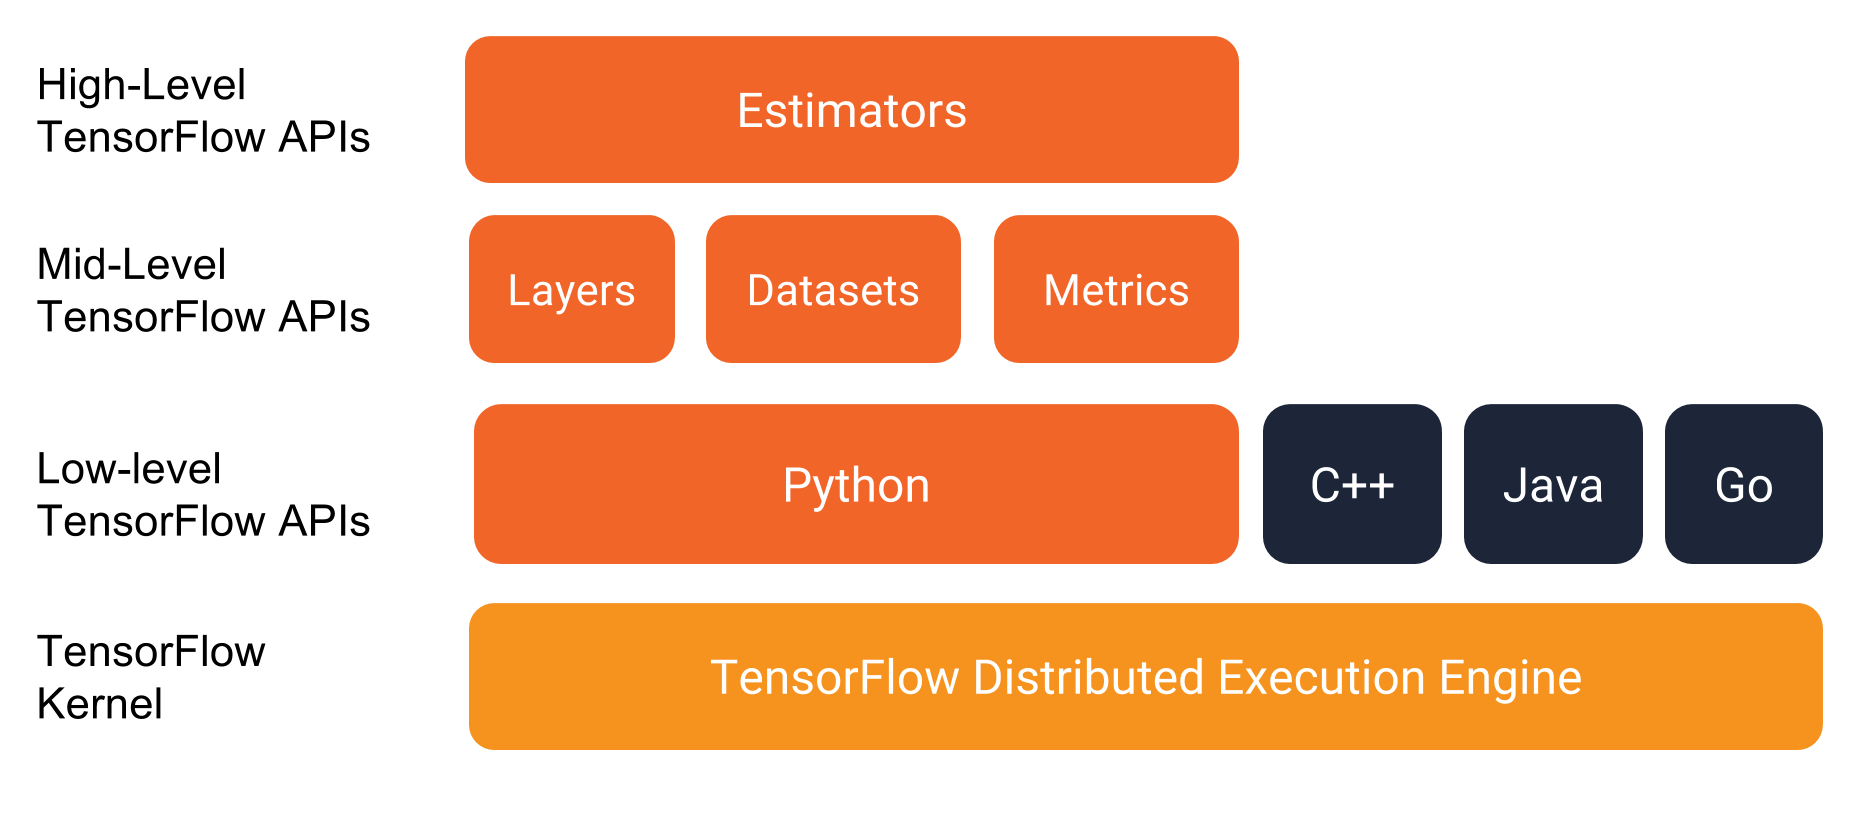

我们强烈建议使用下列 API 编写 TensorFlow 程序：

* Estimator：代表一个完整的模型。Estimator API 提供一些方法来训练模型、判断模型的准确率并生成预测。
* Estimator 的数据集：构建数据输入管道。Dataset API 提供一些方法来加载和操作数据，并将数据馈送到模型中。Dataset API 与 Estimator API 合作无间。

# Estimator
一个高阶 API，可以提供已准备好执行大规模训练和生产的完全打包的模型。

## Estimator简介
https://tensorflow.google.cn/guide/estimators

本文档介绍了 Estimator - 一种可极大地简化机器学习编程的高阶 TensorFlow API。Estimator 会封装下列操作：

* 训练
* 评估
* 预测
* 导出以供使用
您可以使用我们提供的预创建的 Estimator，也可以编写自定义 Estimator。所有 Estimator（无论是预创建的还是自定义）都是基于 `tf.estimator.Estimator` 类的类。

注意：TensorFlow 还包含一个已弃用的 Estimator 类 `tf.contrib.learn.Estimator`，您不应该使用此类。

Estimator 是 TensorFlow 对完整模型的高级表示。它会处理初始化、日志记录、保存和恢复等细节部分，并具有很多其他功能，以便您可以专注于模型。

Estimator 是从 tf.estimator.Estimator 衍生而来的任何类。TensorFlow 提供一组预创建的 [Estimator](https://tensorflow.google.cn/api_docs/python/tf/estimator)（例如 LinearRegressor）来实现常见的机器学习算法。除此之外，您可以编写自定义 Estimator。我们建议在刚开始使用 TensorFlow 时使用预创建的 Estimator。

### Estimator 的优势
Estimator 具有下列优势：

* 您可以在本地主机上或分布式多服务器环境中运行基于 Estimator 的模型，而无需更改模型。此外，您可以在 CPU、GPU 或 TPU 上运行基于 Estimator 的模型，而无需重新编码模型。
* Estimator 简化了在模型开发者之间共享实现的过程。
* 您可以使用高级直观代码开发先进的模型。简言之，采用 Estimator 创建模型通常比采用低阶 TensorFlow API 更简单。
* Estimator 本身在 tf.layers 之上构建而成，可以简化自定义过程。
* Estimator 会为您构建图。
* Estimator 提供安全的分布式训练循环，可以控制如何以及何时：
    * 构建图
    * 初始化变量
    * 开始排队
    * 处理异常
    * 创建检查点文件并从故障中恢复
* 保存 TensorBoard 的摘要

使用 Estimator 编写应用时，您必须__将数据输入管道从模型中分离出来__。这种分离简化了不同数据集的实验流程。



### 推荐的工作流程
我们推荐以下工作流程：

* 假设存在合适的预创建的 Estimator，使用它构建第一个模型并使用其结果确定基准。
* 使用此预创建的 Estimator 构建和测试整体管道，包括数据的完整性和可靠性。
* 如果存在其他合适的预创建的 Estimator，则运行实验来确定哪个预创建的 Estimator 效果最好。
* 可以通过构建自定义 Estimator 进一步改进模型。

### TensorFlow 提供的预创建的 Estimator
https://tensorflow.google.cn/api_docs/python/tf/estimator

* tf.estimator.DNNClassifier：适用于执行多类别分类的深度模型。
* tf.estimator.DNNLinearCombinedClassifier：适用于宽度和深度模型。
* tf.estimator.LinearClassifier：适用于基于线性模型的分类器。

## 预创建的 Estimator
借助预创建的 Estimator，您能够在比基本 TensorFlow API 高级很多的概念层面上进行操作。

由于 Estimator 会为您处理所有“管道工作”，因此您不必再为创建计算图或会话而操心。也就是说，预创建的 Estimator 会为您创建和管理 Graph 和 Session 对象。

此外，借助预创建的 Estimator，您只需稍微更改下代码，就可以尝试不同的模型架构。例如，DNNClassifier 是一个预创建的 Estimator 类，它根据密集的前馈神经网络训练分类模型。

### 预创建的 Estimator 程序的结构
依赖预创建的 Estimator 的 TensorFlow 程序通常包含下列四个步骤：

#### 创建输入函数。 
您必须创建输入函数来提供用于训练、评估和预测的数据。

输入函数是返回 tf.data.Dataset 对象的函数，此对象会输出下列含有两个元素的元组：

* features - Python 字典，其中：
    * 每个键都是特征的名称。
    * 每个值都是包含此特征所有值的数组。
* label - 包含每个样本的标签值的数组。

In [ ]:
def input_fn(dataset):
   ...  # manipulate dataset, extracting the feature dict and the label
   return feature_dict, label

#### 定义特征列。 
每个 tf.feature_column 都标识了特征名称、特征类型和任何输入预处理操作。例如，以下代码段创建了三个存储整数或浮点数据的特征列。前两个特征列仅标识了特征的名称和类型。第三个特征列还指定了一个 lambda，该程序将调用此 lambda 来调节原始数据：

In [ ]:
# Define three numeric feature columns.
population = tf.feature_column.numeric_column('population')
crime_rate = tf.feature_column.numeric_column('crime_rate')
median_education = tf.feature_column.numeric_column('median_education',
                    normalizer_fn=lambda x: x - global_education_mean)

#### 实例化相关的预创建的 Estimator。
例如，下面是对名为 LinearClassifier 的预创建 Estimator 进行实例化的示例代码：

In [ ]:
# Instantiate an estimator, passing the feature columns.
estimator = tf.estimator.LinearClassifier(
    feature_columns=[population, crime_rate, median_education],
    )

#### 调用训练、评估或推理方法。
例如，所有 Estimator 都提供训练模型的 train 方法。

In [ ]:
# my_training_set is the function created in Step 1
estimator.train(input_fn=my_training_set, steps=2000)

### 从 Keras 模型创建 Estimator
您可以将现有的 Keras 模型转换为 Estimator。这样做之后，Keras 模型就可以利用 Estimator 的优势，例如分布式训练。调用 tf.keras.estimator.model_to_estimator，如下例所示：

In [ ]:
# Instantiate a Keras inception v3 model.
keras_inception_v3 = tf.keras.applications.inception_v3.InceptionV3(weights=None)
# Compile model with the optimizer, loss, and metrics you'd like to train with.
keras_inception_v3.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
                          loss='categorical_crossentropy',
                          metric='accuracy')
# Create an Estimator from the compiled Keras model. Note the initial model
# state of the keras model is preserved in the created Estimator.
est_inception_v3 = tf.keras.estimator.model_to_estimator(keras_model=keras_inception_v3)

# Treat the derived Estimator as you would with any other Estimator.
# First, recover the input name(s) of Keras model, so we can use them as the
# feature column name(s) of the Estimator input function:
keras_inception_v3.input_names  # print out: ['input_1']
# Once we have the input name(s), we can create the input function, for example,
# for input(s) in the format of numpy ndarray:
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"input_1": train_data},
    y=train_labels,
    num_epochs=1,
    shuffle=False)
# To train, we call Estimator's train function:
est_inception_v3.train(input_fn=train_input_fn, steps=2000)

请注意，Keras Estimator 的特征列名称和标签来自经过编译的对应 Keras 模型。例如，上面的 train_input_fn 的输入键名称可以从 keras_inception_v3.input_names 获得；同样，预测的输出名称可以从 keras_inception_v3.output_names 获得。

## 预创建的 Estimator示例1
https://tensorflow.google.cn/guide/premade_estimators

本文档介绍了 TensorFlow 编程环境，并向您展示了如何在 TensorFlow 中解决鸢尾花分类问题。

本文档中介绍的程序是 premade_estimator.py。此程序使用 iris_data.py 获取其训练数据。

### 运行程序
您可以像运行任何 Python 程序一样运行 TensorFlow 程序。例如：

In [2]:
!python premade_estimator.py

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/

I0821 15:24:37.129530 140735529624448 basic_session_run_hooks.py:606] Saving checkpoints for 0 into /var/folders/7j/kgtjln3x2dj2g2v57d5vncyw0000gp/T/tmpb36ib7p0/model.ckpt.
I0821 15:24:37.334531 140735529624448 basic_session_run_hooks.py:262] loss = 135.02603, step = 1
I0821 15:24:37.476341 140735529624448 basic_session_run_hooks.py:692] global_step/sec: 702.771
I0821 15:24:37.476802 140735529624448 basic_session_run_hooks.py:260] loss = 23.025366, step = 101 (0.142 sec)
I0821 15:24:37.573368 140735529624448 basic_session_run_hooks.py:692] global_step/sec: 1030.52
I0821 15:24:37.573809 140735529624448 basic_session_run_hooks.py:260] loss = 11.032691, step = 201 (0.097 sec)
I0821 15:24:37.672002 140735529624448 basic_session_run_hooks.py:692] global_step/sec: 1013.85
I0821 15:24:37.672456 140735529624448 basic_session_run_hooks.py:260] loss = 9.210818, step = 301 (0.099 sec)
I0821 15:24:37.769164 140735529624448 basic_session_run_hooks.py:692] global_step/sec: 1029.26
I0821 15:24:37.769

该程序应该会输出训练日志，然后对测试集进行一些预测。例如，以下输出的第一行显示该模型认为测试集中的第一个样本是山鸢尾的可能性为 99.6％。由于测试集中的第一个样本确实是山鸢尾，因此该模型预测得还比较准确。

### 数据集中的三个样本：
花萼长度|	花萼宽度|	花瓣长度|	花瓣宽度|	品种（标签）
-|-|-|-|-|
5.1|	3.3|	1.7|	0.5|	0（山鸢尾）
5.0|	2.3|	3.3|	1.0|	1（变色鸢尾）
6.4|	2.8|	5.6|	2.2|	2（维吉尼亚鸢尾）

### 创建输入函数

In [ ]:
def input_evaluation_set():
    features = {'SepalLength': np.array([6.4, 5.0]),
                'SepalWidth':  np.array([2.8, 2.3]),
                'PetalLength': np.array([5.6, 3.3]),
                'PetalWidth':  np.array([2.2, 1.0])}
    labels = np.array([2, 1])
    return features, labels

不过，我们建议使用 TensorFlow 的 Dataset API，它可以解析各种数据。

In [ ]:
def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

### 定义特征列
特征列是一个对象，用于说明模型应该如何使用特征字典中的原始输入数据。在构建 Estimator 模型时，您会向其传递一个特征列的列表，其中包含您希望模型使用的每个特征。tf.feature_column 模块提供很多用于在模型中表示数据的选项。

对于鸢尾花问题，4 个原始特征是数值，因此我们会构建一个特征列的列表，以告知 Estimator 模型将这 4 个特征都表示为 32 位浮点值。因此，创建特征列的代码如下所示：



In [ ]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train_x.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

特征列可能比上述示例复杂得多。我们将在入门指南的后面部分详细介绍特征列。

我们已经介绍了希望模型如何表示原始特征，现在可以构建 Estimator 了。

### 实例化 Estimator

In [ ]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 10 nodes each.
    hidden_units=[10, 10],
    # The model must choose between 3 classes.
    n_classes=3)

### 训练、评估和预测

In [ ]:
# Train the Model.
classifier.train(
    input_fn=lambda:iris_data.train_input_fn(train_x, train_y, args.batch_size),
    steps=args.train_steps)

In [ ]:
# Evaluate the model.
eval_result = classifier.evaluate(
    input_fn=lambda:iris_data.eval_input_fn(test_x, test_y, args.batch_size))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

In [ ]:
# Generate predictions from the model
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

predictions = classifier.predict(
    input_fn=lambda:iris_data.eval_input_fn(predict_x,
                                            batch_size=args.batch_size))

predict 方法返回一个 Python 可迭代对象，为每个样本生成一个预测结果字典。以下代码输出了一些预测及其概率：

In [ ]:
template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')

for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print(template.format(iris_data.SPECIES[class_id],
                          100 * probability, expec))

## 检查点
https://tensorflow.google.cn/guide/checkpoints

## 特征列
https://tensorflow.google.cn/guide/feature_columns

## Estimator 的数据集
https://tensorflow.google.cn/guide/datasets_for_estimators

## Estimator示例2

https://tensorflow.google.cn/tutorials/estimators/linear

我们会使用包含个人年龄、受教育程度、婚姻状况和职业（即特征）数据在内的普查数据，尝试预测个人年收入是否超过 5 万美元（即目标标签）。我们会训练一个逻辑回归模型，若给出某个人的信息，该模型会输出一个介于 0 到 1 之间的值，可将该值解读为个人年收入超过 5 万美元的概率。

In [2]:
import tensorflow as tf
import tensorflow.feature_column as fc

import os
import sys

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
# 然后启用 Eager Execution，以在此程序运行时检查此程序：
tf.enable_eager_execution()

In [4]:
models_path = '/Users/luoyonggui/Documents/temp/models'
sys.path.append(models_path)

In [6]:
from official.wide_deep import census_dataset
from official.wide_deep import census_main
download_dir = "data_gen/census_data/"
census_dataset.download(download_dir)

In [7]:
train_file = f"{download_dir}adult.data"
test_file = f"{download_dir}adult.test"

In [8]:
census_dataset._CSV_COLUMNS

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_bracket']

In [11]:
import pandas as pd

train_df = pd.read_csv(train_file, header = None, names = census_dataset._CSV_COLUMNS)
test_df = pd.read_csv(test_file, header = None, names = census_dataset._CSV_COLUMNS)

### 数据集存入MongoDB

In [12]:
# import sys

# sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/db')

# from pymongo_wrapper import PyMongoWrapper 

# pmw = PyMongoWrapper()

# df = pd.concat([train_df, test_df], ignore_index=True)

# dd = '数据量越4.8w条。我们会使用包含个人年龄、受教育程度、婚姻状况和职业（即特征）数据在内的普查数据，尝试预测个人年收入是否超过 5 万美元（即目标标签）。'

# pmw.insertDataframe(df, 'datasets', 'census_dataset', dd)

In [63]:
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [66]:
train_df.income_bracket.value_counts()

<=50K    24720
>50K      7841
Name: income_bracket, dtype: int64

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
gender            16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
income_bracket    16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


### 这些列分为两类 - 类别列和连续列：

* 如果某个列的值只能是一个有限集合中的类别之一，则该列称为类别列。例如，婚恋状况（妻子、丈夫、未婚等）或受教育程度（高中、大学等）属于类别列。
* 如果某个列的值可以是连续范围内的任意数值，则该列称为连续列。例如，一个人的资本收益（如 14084 美元）属于连续列。

In [27]:
def easy_input_function(df, label_key, num_epochs, shuffle, batch_size):
  label = df[label_key]
  ds = tf.data.Dataset.from_tensor_slices((dict(df),label))

  if shuffle:
    ds = ds.shuffle(10000)

  ds = ds.batch(batch_size).repeat(num_epochs)

  return ds

In [28]:
type(dict(train_df)['age'])

pandas.core.series.Series

In [29]:
ds = easy_input_function(train_df, label_key='income_bracket', num_epochs=5, shuffle=True, batch_size=10)

for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys())[:5])
  print()
  print('A batch of Ages  :', feature_batch['age'])
  print()
  print('A batch of Labels:', label_batch )

Some feature keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

A batch of Ages  : tf.Tensor([23 47 48 43 26 35 45 28 58 30], shape=(10,), dtype=int32)

A batch of Labels: tf.Tensor(
[b'<=50K' b'<=50K' b'>50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K' b'<=50K'
 b'<=50K' b'<=50K'], shape=(10,), dtype=string)


因为 Estimators 要求 input_fn 不接受任何参数，因此我们通常会将可配置的输入函数封装到带预期签名的对象中。对于此笔记本，请配置 train_inpf 以迭代数据两次：

In [30]:
import functools

train_inpf = functools.partial(census_dataset.input_fn, train_file, num_epochs=2, shuffle=True, batch_size=64)
test_inpf = functools.partial(census_dataset.input_fn, test_file, num_epochs=1, shuffle=False, batch_size=64)

### 为模型选择特征并进行特征工程处理
Estimator 使用__特征列__的机制来描述模型应如何解读每个原始输入特征。

Estimator 需要数值输入向量，而特征列会描述模型应如何转换每个特征。

选择和创建一组正确的特征列是学习有效模型的关键。特征列可以是原始特征 dict 中的其中一个原始输入（基准特征列），也可以是对一个或多个基准列进行转换而创建的任意新列（衍生特征列）。

特征列是一个抽象概念，表示可用于预测目标标签的任何原始变量或衍生变量。

### 数值列
最简单的 feature_column 是 numeric_column。它表示特征是数值，应直接输入到模型中。例如：

In [31]:
age = fc.numeric_column('age')

#### 模型将使用 feature_column 定义来构建模型输入。您可以使用 input_layer 函数检查生成的输出：

In [32]:
fc.input_layer(feature_batch, [age]).numpy()

array([[23.],
       [47.],
       [48.],
       [43.],
       [26.],
       [35.],
       [45.],
       [28.],
       [58.],
       [30.]], dtype=float32)

以下代码将仅使用 age 特征训练和评估模型：

In [33]:
classifier = tf.estimator.LinearClassifier(feature_columns=[age])
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)
clear_output() 
print(result)

{'accuracy': 0.7602113, 'accuracy_baseline': 0.76377374, 'auc': 0.6783378, 'auc_precision_recall': 0.31138876, 'average_loss': 0.523249, 'label/mean': 0.23622628, 'loss': 33.40791, 'precision': 0.15476191, 'prediction/mean': 0.24236183, 'recall': 0.0033801352, 'global_step': 1018}


同样，我们可以为要在模型中使用的每个连续特征列定义 NumericColumn：

In [35]:
education_num = tf.feature_column.numeric_column('education_num')
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column('hours_per_week')

my_numeric_columns = [age,education_num, capital_gain, capital_loss, hours_per_week]

fc.input_layer(feature_batch, my_numeric_columns).numpy()

array([[23.,  0.,  0.,  9., 35.],
       [47.,  0.,  0.,  6., 30.],
       [48.,  0.,  0., 14., 40.],
       [43.,  0.,  0., 13., 45.],
       [26.,  0.,  0., 13., 15.],
       [35.,  0.,  0., 10., 40.],
       [45.,  0.,  0., 13., 46.],
       [28.,  0.,  0., 12., 40.],
       [58.,  0.,  0.,  9., 40.],
       [30.,  0.,  0., 12., 40.]], dtype=float32)

In [36]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns)
classifier.train(train_inpf)

result = classifier.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
    print('%s: %s' % (key, value))

accuracy: 0.76303667
accuracy_baseline: 0.76377374
auc: 0.52643937
auc_precision_recall: 0.32482183
average_loss: 1.4849874
global_step: 1018
label/mean: 0.23622628
loss: 94.81208
precision: 0.49204245
prediction/mean: 0.15183072
recall: 0.09646386


### 类别列
要为类别特征定义特征列，请使用其中一个 tf.feature_column.categorical_column* 函数创建 CategoricalColumn。

如果您知道某个列的所有可能特征值的集合，并且集合中只有几个值，请使用 categorical_column_with_vocabulary_list。列表中的每个键会被分配自动递增的 ID（从 0 开始）。例如，对于 relationship 列，我们可以将整数 ID 0 分配给特征字符串 Husband，将 1 分配给“Not-in-family”，以此类推。

In [37]:
relationship = fc.categorical_column_with_vocabulary_list(
    'relationship',
    ['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', 'Other-relative'])

上述代码将根据原始输入特征创建一个稀疏的独热向量。

我们使用的 input_layer 函数是专为 DNN 模型设计的，要求提供密集输入。要演示类别列，我们必须将其封装在 tf.feature_column.indicator_column 中，以创建密集的独热输出（线性 Estimators 通常可以跳过此密集步骤）。

运行使用 age 和 relationship 列进行配置的输入层：

In [39]:
fc.input_layer(feature_batch, [age, fc.indicator_column(relationship)])

<tf.Tensor: id=5116, shape=(10, 7), dtype=float32, numpy=
array([[23.,  0.,  0.,  0.,  0.,  1.,  0.],
       [47.,  0.,  0.,  0.,  0.,  1.,  0.],
       [48.,  1.,  0.,  0.,  0.,  0.,  0.],
       [43.,  0.,  0.,  0.,  0.,  1.,  0.],
       [26.,  0.,  1.,  0.,  0.,  0.,  0.],
       [35.,  0.,  0.,  0.,  0.,  1.,  0.],
       [45.,  0.,  1.,  0.,  0.,  0.,  0.],
       [28.,  0.,  0.,  0.,  0.,  0.,  1.],
       [58.,  0.,  1.,  0.,  0.,  0.,  0.],
       [30.,  0.,  1.,  0.,  0.,  0.,  0.]], dtype=float32)>

#### 如果我们事先不知道可能值的集合，请改用 categorical_column_with_hash_bucket：

In [40]:
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    'occupation', hash_bucket_size=1000)

In [41]:
for item in feature_batch['occupation'].numpy():
    print(item, item.decode())

b'Other-service' Other-service
b'Sales' Sales
b'Prof-specialty' Prof-specialty
b'Prof-specialty' Prof-specialty
b'Prof-specialty' Prof-specialty
b'Adm-clerical' Adm-clerical
b'Prof-specialty' Prof-specialty
b'?' ?
b'Adm-clerical' Adm-clerical
b'Prof-specialty' Prof-specialty


如果我们使用经过哈希处理的列运行 input_layer，则看到输出形状为 (batch_size, hash_bucket_size)：

In [43]:
occupation_result = fc.input_layer(feature_batch, [fc.indicator_column(occupation)])

occupation_result.numpy().shape

(10, 1000)

如果我们对 hash_bucket_size 维度执行 tf.argmax 操作，则更容易看到实际结果。请注意，所有重复的职业都映射到相同的伪随机索引：

In [44]:
tf.argmax(occupation_result, axis=1).numpy()

array([527, 631, 979, 979, 979,  96, 979,  65,  96, 979])

哈希冲突是不可避免的，但对模型质量的影响通常很小。如果使用哈希分桶压缩输入空间，则影响可能比较明显。有关这些哈希冲突所产生影响的更直观示例，请参阅此笔记本。..

无论我们如何选择定义 SparseColumn，都可通过查询固定映射或通过哈希处理将各个特征字符串映射到一个整数 ID。实际上，LinearModel 类负责管理映射和创建 tf.Variable，以便存储每个特征 ID 的模型参数（模型权重）。这些模型参数是通过稍后介绍的模型训练流程学习的。

我们可以使用类似的技巧定义其他类别特征：

In [45]:
education = tf.feature_column.categorical_column_with_vocabulary_list(
    'education', [
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])

marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    'marital_status', [
        'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
        'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'])

workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    'workclass', [
        'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'])

my_categorical_columns = [relationship, occupation, education, marital_status, workclass]

In [46]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns+my_categorical_columns)
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
  print('%s: %s' % (key, value))

accuracy: 0.8223082
accuracy_baseline: 0.76377374
auc: 0.879159
auc_precision_recall: 0.6767671
average_loss: 0.6157621
global_step: 1018
label/mean: 0.23622628
loss: 39.314598
precision: 0.60638535
prediction/mean: 0.29963747
recall: 0.70618826


In [43]:
education = tf.feature_column.categorical_column_with_vocabulary_list(
    'education', [
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])

marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    'marital_status', [
        'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
        'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'])

workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    'workclass', [
        'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'])

my_categorical_columns = [relationship, occupation, education, marital_status, workclass]

In [44]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns+my_categorical_columns)
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
  print('%s: %s' % (key, value))

accuracy: 0.79896814
accuracy_baseline: 0.76377374
auc: 0.7234093
auc_precision_recall: 0.52057433
average_loss: 1.0791507
global_step: 1018
label/mean: 0.23622628
loss: 68.9006
precision: 0.6750153
prediction/mean: 0.13123396
recall: 0.2873115


### 衍生特征列
#### 通过分桶将连续特征变成类别特征  
有时，连续特征与标签不是线性关系。例如，年龄和收入 - 一个人的收入在其职业生涯早期阶段会增长，然后在某一阶段，增长速度减慢，最后，在退休后减少。在这种情况下，使用原始 age 作为实值特征列也许并非理想之选，因为模型只能学习以下三种情况之一：

1. 收入始终随着年龄的增长而以某一速率增长（正相关）；
1. 收入始终随着年龄的增长而以某一速率减少（负相关）；或者
1. 无论年龄多大，收入都保持不变（不相关）。

如果我们要分别学习收入与各个年龄段之间的精细关系，则可以采用分桶技巧。分桶是将整个连续特征范围分割为一组连续分桶，然后根据值所在的分桶将原数值特征转换为分桶 ID（作为类别特征）的过程。因此，我们可以针对 age 将 bucketized_column 定义为：

In [47]:
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

boundaries 是分桶边界列表。本示例中有 10 个边界，因此会生成 11 个年龄段分桶（17 岁及以下、18-24 岁、25-29 岁、…，以及 65 岁及以上）。

通过分桶，模型将每个分桶视为一个独热特征：

In [49]:
fc.input_layer(feature_batch, [age, age_buckets]).numpy()

array([[23.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [47.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [48.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [43.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [26.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [35.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [45.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [28.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [30.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],
      dtype=float32)

#### 通过组合列学习复杂关系
单独使用各个基准特征列可能不足以解释数据。例如，对于不同的职业，受教育程度和标签（收入超过 5 万美元）之间的相关性可能各不相同。因此，如果我们仅学习 education="Bachelors" 和 education="Masters" 的单个模型权重，则无法捕获每个受教育程度-职业组合（例如，区分 education="Bachelors" AND occupation="Exec-managerial" 和 education="Bachelors" AND occupation="Craft-repair"）。

要了解各个特征组合之间的差异，我们可以向模型中添加组合特征列：

In [50]:
education_x_occupation = tf.feature_column.crossed_column(
    ['education', 'occupation'], hash_bucket_size=1000)

我们还可以针对两个以上的列创建一个 crossed_column。每个组成列可以是类别基准特征列 (SparseColumn)、分桶实值特征列，也可以是其他 CrossColumn。例如：

In [51]:
age_buckets_x_education_x_occupation = tf.feature_column.crossed_column(
    [age_buckets, 'education', 'occupation'], hash_bucket_size=1000)

这些组合列始终使用哈希分桶来避免类别数量的指数爆炸，由用户控制模型权重的数量。

### 定义逻辑回归模型
处理输入数据并定义所有特征列后，我们可以将它们整合在一起，并构建逻辑回归模型。上一部分介绍了几类基准特征列和衍生特征列，包括：

1. CategoricalColumn
1. NumericColumn
1. BucketizedColumn
1. CrossedColumn

所有这些列都是抽象 FeatureColumn 类的子类，并且可添加到模型的 feature_columns 字段中：

In [52]:
import tempfile

base_columns = [
    education, marital_status, relationship, workclass, occupation,
    age_buckets,
]

crossed_columns = [
    tf.feature_column.crossed_column(
        ['education', 'occupation'], hash_bucket_size=1000),
    tf.feature_column.crossed_column(
        [age_buckets, 'education', 'occupation'], hash_bucket_size=1000),
]

model = tf.estimator.LinearClassifier(
    model_dir=tempfile.mkdtemp(),
    feature_columns=base_columns + crossed_columns,
    optimizer=tf.train.FtrlOptimizer(learning_rate=0.1))

模型会自动学习偏差项，偏差项可控制所进行的预测，而无需观察任何特征。学习的模型文件存储在 model_dir 中。

### 训练和评估模型
将所有特征添加到模型中后，开始训练模型。训练模型只需一个使用 tf.estimator API 的命令：

In [53]:
train_inpf = functools.partial(census_dataset.input_fn, train_file,
                               num_epochs=40, shuffle=True, batch_size=64)

model.train(train_inpf)

clear_output()  # used for notebook display

训练模型后，通过预测维持数据的标签来评估模型的准确率：

In [54]:
results = model.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
  print('%s: %0.2f' % (key, value))

accuracy: 0.82
accuracy_baseline: 0.76
auc: 0.88
auc_precision_recall: 0.68
average_loss: 0.62
global_step: 1018.00
label/mean: 0.24
loss: 39.31
precision: 0.61
prediction/mean: 0.30
recall: 0.71


输出的第一行应显示诸如 accuracy: 0.83 的内容，表示准确率为 83%。您可以尝试使用更多特征和转换，看看能否取得更好的结果！

评估模型后，我们可以向模型输入某个人的信息，让其预测这个人的年收入是否超过 5 万美元。

我们来详细了解一下模型的表现：

In [55]:
import numpy as np

predict_df = test_df[:20].copy()

pred_iter = model.predict(
    lambda:easy_input_function(predict_df, label_key='income_bracket',
                               num_epochs=1, shuffle=False, batch_size=10))

classes = np.array(['<=50K', '>50K'])
pred_class_id = []

for pred_dict in pred_iter:
  pred_class_id.append(pred_dict['class_ids'])

predict_df['predicted_class'] = classes[np.array(pred_class_id)]
predict_df['correct'] = predict_df['predicted_class'] == predict_df['income_bracket']

clear_output()

predict_df[['income_bracket','predicted_class', 'correct']]

,income_bracket,predicted_class,correct
0,<=50K,<=50K,True
1,<=50K,<=50K,True
2,>50K,<=50K,False
3,>50K,<=50K,False
4,<=50K,<=50K,True
5,<=50K,<=50K,True
6,<=50K,<=50K,True
7,>50K,>50K,True
8,<=50K,<=50K,True
9,<=50K,<=50K,True


### 添加正则化以防止过拟合
正则化是用于避免过拟合的技术。如果模型在训练数据上表现良好，但在从未见过的测试数据上表现糟糕，就表示发生了过拟合。模型过于复杂（例如，相对于观察的训练数据量而言，采用的参数过多）会发生过拟合。借助正则化，您能够控制模型的复杂度，并使模型能够更好地泛化到未见过的数据。

您可以使用以下代码向模型中添加 L1 和 L2 正则化：

In [56]:
model_l1 = tf.estimator.LinearClassifier(
    feature_columns=base_columns + crossed_columns,
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=10.0,
        l2_regularization_strength=0.0))

model_l1.train(train_inpf)

results = model_l1.evaluate(test_inpf)
clear_output()
for key in sorted(results):
  print('%s: %0.2f' % (key, results[key]))

accuracy: 0.84
accuracy_baseline: 0.76
auc: 0.88
auc_precision_recall: 0.69
average_loss: 0.35
global_step: 20351.00
label/mean: 0.24
loss: 22.47
precision: 0.69
prediction/mean: 0.24
recall: 0.56


In [58]:
model_l2 = tf.estimator.LinearClassifier(
    feature_columns=base_columns + crossed_columns,
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=0.0,
        l2_regularization_strength=10.0))

model_l2.train(train_inpf)

results = model_l2.evaluate(test_inpf)
clear_output()
for key in sorted(results):
  print('%s: %0.2f' % (key, results[key]))

accuracy: 0.84
accuracy_baseline: 0.76
auc: 0.88
auc_precision_recall: 0.69
average_loss: 0.35
global_step: 20351.00
label/mean: 0.24
loss: 22.47
precision: 0.68
prediction/mean: 0.24
recall: 0.57


这些经过正则化的模型表现得并不比基准模型好很多。我们来看看模型的权重分布，以更好地了解正则化的影响：

In [59]:
def get_flat_weights(model):
  weight_names = [
      name for name in model.get_variable_names()
      if "linear_model" in name and "Ftrl" not in name]

  weight_values = [model.get_variable_value(name) for name in weight_names]

  weights_flat = np.concatenate([item.flatten() for item in weight_values], axis=0)

  return weights_flat

weights_flat = get_flat_weights(model)
weights_flat_l1 = get_flat_weights(model_l1)
weights_flat_l2 = get_flat_weights(model_l2)

模型中包含很多由未使用的哈希分箱所致的零值权重（在某些列中，哈希分箱的数量多于类别数量）。查看权重分布时，我们可以掩盖这些权重：

In [60]:
weight_mask = weights_flat != 0

weights_base = weights_flat[weight_mask]
weights_l1 = weights_flat_l1[weight_mask]
weights_l2 = weights_flat_l2[weight_mask]

现在，绘制分布图：

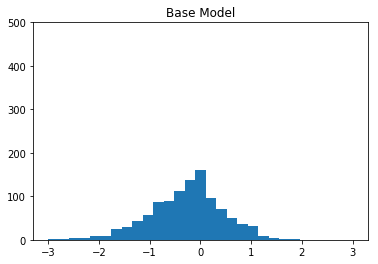

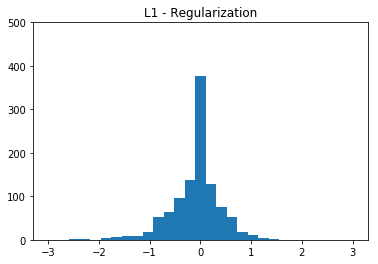

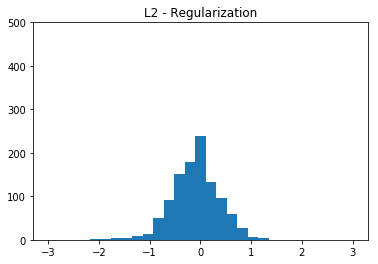

In [61]:
plt.figure()
_ = plt.hist(weights_base, bins=np.linspace(-3,3,30))
plt.title('Base Model')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l1, bins=np.linspace(-3,3,30))
plt.title('L1 - Regularization')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l2, bins=np.linspace(-3,3,30))
plt.title('L2 - Regularization')
_=plt.ylim([0,500])

这两种类型的正则化都使权重向零靠近，使其分布在零附近。L2 正则化对分布尾端的影响比较大，可消除极端权重。L1 正则化生成更多确切的零值，在本示例中，它将 ~200 设置为零值。

## 示例3：Train Boosted Trees models in TensorFlow
https://tensorflow.google.cn/tutorials/estimators/boosted_trees

This tutorial is an end-to-end walkthrough of training a Gradient Boosting model using decision trees with the tf.estimator API. Boosted Trees models are among the most popular and effective machine learning approaches for both regression and classification. It is an ensemble technique that combines the predictions from several (think 10s, 100s or even 1000s) tree models.

Boosted Trees models are popular with many machine learning practioners as they can achieve impressive performance with minimal hyperparameter tuning.

### Load the titanic dataset
You will be using the titanic dataset, where the (rather morbid) goal is to predict passenger survival, given characteristics such as gender, age, class, etc.

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf

tf.enable_eager_execution()

tf.logging.set_verbosity(tf.logging.ERROR)
tf.set_random_seed(123)

In [32]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tfbt/titanic_train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tfbt/titanic_eval.csv')

### 数据集存入MongoDB

In [33]:
# import sys

# sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/db')

# from pymongo_wrapper import PyMongoWrapper 

# pmw = PyMongoWrapper()

# df = pd.concat([dftrain, dfeval], ignore_index=True)
# dd = """
# the titanic dataset, 数据量891条, where the goal is to predict passenger survival, given characteristics such as gender, age, class, etc.
# 特征描述
# sex：Gender of passenger
# age：Age of passenger
# n_siblings_spouses：# siblings and partners aboard
# parch：# of parents and children aboard
# fare：Fare passenger paid.
# class：Passenger's class on ship
# deck：Which deck passenger was on
# embark_town：Which town passenger embarked from
# alone：If passenger was alone
# """
# pmw.insertDataframe(df, 'datasets', 'titanic_dataset', dd)

In [28]:
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

### Explore the data
Let's first preview some of the data and create summary statistics on the training set.

In [29]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [30]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


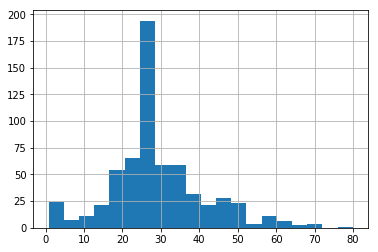

In [34]:
dftrain.age.hist(bins=20);

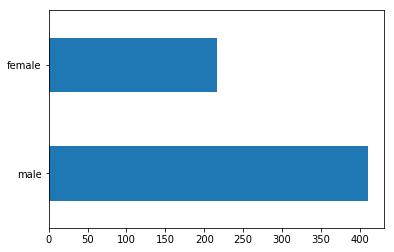

In [35]:
dftrain.sex.value_counts().plot(kind='barh');

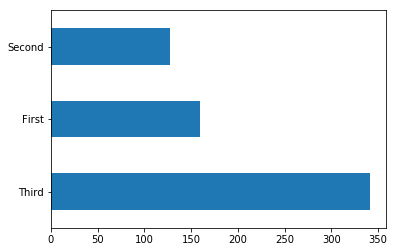

In [36]:
(dftrain['class']
  .value_counts()
  .plot(kind='barh'));

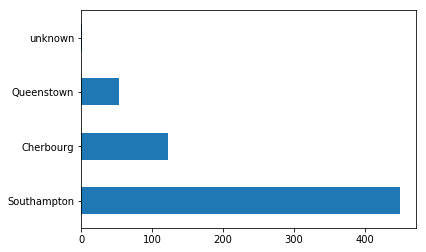

In [37]:
(dftrain['embark_town']
  .value_counts()
  .plot(kind='barh'));

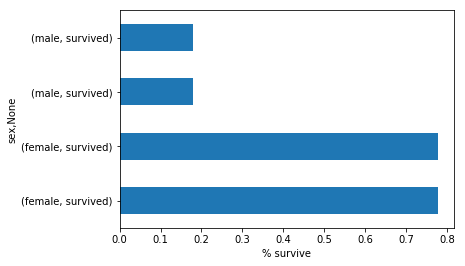

In [38]:
ax = (pd.concat([dftrain, y_train], axis=1)\
  .groupby('sex')
  .survived
  .mean()
  .plot(kind='barh'))
ax.set_xlabel('% survive');

### Create feature columns and input functions
The Gradient Boosting estimator can utilize both numeric and categorical features. Feature columns work with all TensorFlow estimators and their purpose is to define the features used for modeling. Additionally they provide some feature engineering capabilities like one-hot-encoding, normalization, and bucketization. In this tutorial, the fields in CATEGORICAL_COLUMNS are transformed from categorical columns to one-hot-encoded columns (indicator column):

In [39]:
fc = tf.feature_column
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']
  
def one_hot_cat_column(feature_name, vocab):
  return fc.indicator_column(
      fc.categorical_column_with_vocabulary_list(feature_name,
                                                 vocab))
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  # Need to one-hot encode categorical features.
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(one_hot_cat_column(feature_name, vocabulary))
  
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(fc.numeric_column(feature_name,
                                           dtype=tf.float32))

In [40]:
example = dftrain.head(1)
class_fc = one_hot_cat_column('class', ('First', 'Second', 'Third'))
print('Feature value: "{}"'.format(example['class'].iloc[0]))
print('One-hot encoded: ', fc.input_layer(dict(example), [class_fc]).numpy())

Feature value: "Third"
One-hot encoded:  [[0. 0. 1.]]


In [41]:
fc.input_layer(dict(example), feature_columns).numpy()

array([[22.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         7.25,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ]], dtype=float32)

In [42]:
# Use entire batch since this is such a small dataset.
NUM_EXAMPLES = len(y_train)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    if shuffle:
      dataset = dataset.shuffle(NUM_EXAMPLES)
    # For training, cycle thru dataset as many times as need (n_epochs=None).    
    dataset = dataset.repeat(n_epochs)  
    # In memory training doesn't use batching.
    dataset = dataset.batch(NUM_EXAMPLES)
    return dataset
  return input_fn

# Training and evaluation input functions.
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, shuffle=False, n_epochs=1)

### Train and evaluate the model
Below you will do the following steps:

1. Initialize the model, specifying the features and hyperparameters.
1. Feed the training data to the model using the train_input_fn and train the model using the train function.
1. You will assess model performance using the evaluation set—in this example, the dfeval DataFrame. You will verify that the predictions match the labels from the y_eval array.

Before training a Boosted Trees model, let's first train a linear classifier (logistic regression model). __It is best practice to start with simpler model to establish a benchmark__.

In [43]:
linear_est = tf.estimator.LinearClassifier(feature_columns)

# Train model.
linear_est.train(train_input_fn, max_steps=100)

# Evaluation.
results = linear_est.evaluate(eval_input_fn)
print('Accuracy : ', results['accuracy'])
print('Dummy model: ', results['accuracy_baseline'])

Accuracy :  0.78409094
Dummy model:  0.625


Next let's train a Boosted Trees model. For boosted trees, regression (BoostedTreesRegressor) and classification (BoostedTreesClassifier) are supported, along with using any twice differentiable custom loss (BoostedTreesEstimator). Since the goal is to predict a class - survive or not survive, you will use the BoostedTreesClassifier.

In [44]:
# Since data fits into memory, use entire dataset per layer. It will be faster.
# Above one batch is defined as the entire dataset. 
n_batches = 1
est = tf.estimator.BoostedTreesClassifier(feature_columns,
                                          n_batches_per_layer=n_batches)

# The model will stop training once the specified number of trees is built, not 
# based on the number of steps.
est.train(train_input_fn, max_steps=100)

# Eval.
results = est.evaluate(eval_input_fn)
print('Accuracy : ', results['accuracy'])
print('Dummy model: ', results['accuracy_baseline'])

Accuracy :  0.8181818
Dummy model:  0.625


For performance reasons, when your data fits in memory, it is recommended to use the boosted_trees_classifier_train_in_memory function. However if training time is not of a concern or if you have a very large dataset and want to do distributed training, use the tf.estimator.BoostedTrees API shown above.

When using this method, you should not batch your input data, as the method operates on the entire dataset.

In [45]:
def make_inmemory_train_input_fn(X, y):
  def input_fn():
    return dict(X), y
  return input_fn


train_input_fn = make_inmemory_train_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, shuffle=False, n_epochs=1)
est = tf.contrib.estimator.boosted_trees_classifier_train_in_memory(
    train_input_fn,
    feature_columns)
print(est.evaluate(eval_input_fn)['accuracy'])

InvalidArgumentError: Retval[0] does not have value

Now you can use the train model to make predictions on a passenger from the evaluation set. TensorFlow models are optimized to make predictions on a batch, or collection, of examples at once. Earlier, the eval_input_fn is defined using the entire evaluation set.

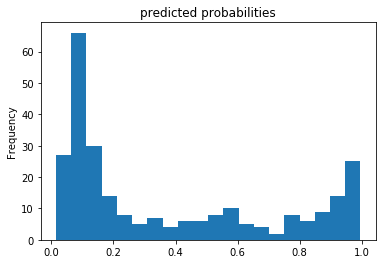

In [46]:
pred_dicts = list(est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities');

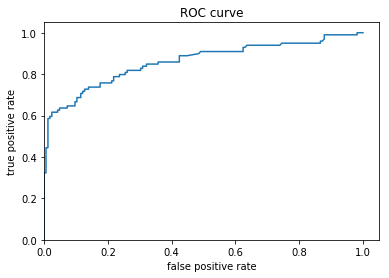

In [47]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,);

## How to interpret Boosted Trees models both locally and globally
__Local interpretability__ refers to an understanding of a model’s predictions at the individual example level, 

while __global interpretability__ refers to an understanding of the model as a whole. Such techniques can help machine learning (ML) practitioners detect bias and bugs during the model development stage

#### DFC
For local interpretability, you will learn how to create and visualize per-instance contributions. To distinguish this from feature importances, we refer to these values as directional feature contributions (DFCs).

For global interpretability you will retrieve and visualize gain-based feature importances, permutation feature importances and also show aggregated DFCs.

In [51]:
params = {
  'n_trees': 50,
  'max_depth': 3,
  'n_batches_per_layer': 1,
  # You must enable center_bias = True to get DFCs. This will force the model to 
  # make an initial prediction before using any features (e.g. use the mean of 
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
  'center_bias': True
}

est = tf.estimator.BoostedTreesClassifier(feature_columns, **params)
est.train(train_input_fn, max_steps=100)
results = est.evaluate(eval_input_fn)
pd.Series(results).to_frame()

,0
accuracy,0.806818
accuracy_baseline,0.625000
auc,0.866912
auc_precision_recall,0.845375
average_loss,0.421325
label/mean,0.375000
loss,0.421325
precision,0.755319
prediction/mean,0.385955
recall,0.717172


### Model interpretation and plotting

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns_colors = sns.color_palette('colorblind')

### Local interpretability
Next you will output the directional feature contributions (DFCs) to explain individual predictions using the approach outlined in Palczewska et al and by Saabas in Interpreting Random Forests (this method is also available in scikit-learn for Random Forests in the treeinterpreter package). The DFCs are generated with:

pred_dicts = list(est.experimental_predict_with_explanations(pred_input_fn))

(Note: The method is named experimental as we may modify the API before dropping the experimental prefix.)

In [52]:
pred_dicts = list(est.experimental_predict_with_explanations(eval_input_fn))

In [53]:
# Create DFC Pandas dataframe.
labels = y_eval.values
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
df_dfc = pd.DataFrame([pred['dfc'] for pred in pred_dicts])
df_dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
age,264.0,-0.026862,0.082829,-0.139371,-0.076842,-0.052102,0.002211,0.386390
sex,264.0,0.006737,0.106699,-0.119390,-0.072671,-0.071626,0.137270,0.179512
class,264.0,0.016734,0.092618,-0.064875,-0.045993,-0.045135,0.034229,0.234408
deck,264.0,-0.017257,0.027826,-0.053402,-0.041958,-0.029278,0.003205,0.135835
embark_town,264.0,-0.006565,0.025406,-0.050538,-0.013339,-0.012524,-0.002695,0.062287
fare,264.0,0.021866,0.083538,-0.245627,-0.020564,-0.006466,0.047864,0.220934
n_siblings_spouses,264.0,0.003602,0.021756,-0.120361,0.002998,0.003542,0.006204,0.104273
parch,264.0,0.000140,0.003229,-0.052080,0.000235,0.000285,0.000497,0.000574
alone,264.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
# Sum of DFCs + bias == probabality.
bias = pred_dicts[0]['bias']
dfc_prob = df_dfc.sum(axis=1) + bias
np.testing.assert_almost_equal(dfc_prob.values,
                               probs.values)

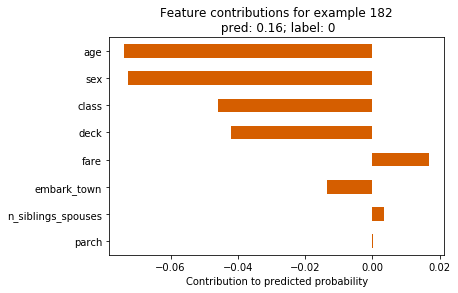

In [55]:
# Plot results.
ID = 182
example = df_dfc.iloc[ID]  # Choose ith example from evaluation set.
TOP_N = 8  # View top 8 features.
sorted_ix = example.abs().sort_values()[-TOP_N:].index
ax = example[sorted_ix].plot(kind='barh', color=sns_colors[3])
ax.grid(False, axis='y')

ax.set_title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'.format(ID, probs[ID], labels[ID]))
ax.set_xlabel('Contribution to predicted probability');

In [56]:
# Boilerplate code for plotting :)
def _get_color(value):
    """To make positive DFCs plot green, negative DFCs plot red."""
    green, red = sns.color_palette()[2:4]
    if value >= 0: return green
    return red

def _add_feature_values(feature_values, ax):
    """Display feature's values on left of plot."""
    x_coord = ax.get_xlim()[0]
    OFFSET = 0.15
    for y_coord, (feat_name, feat_val) in enumerate(feature_values.items()):
        t = plt.text(x_coord, y_coord - OFFSET, '{}'.format(feat_val), size=12)
        t.set_bbox(dict(facecolor='white', alpha=0.5))
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_weight('bold')
    t = plt.text(x_coord, y_coord + 1 - OFFSET, 'feature\nvalue',
    fontproperties=font, size=12)
    
def plot_example(example):
  TOP_N = 8 # View top 8 features.
  sorted_ix = example.abs().sort_values()[-TOP_N:].index  # Sort by magnitude.
  example = example[sorted_ix]
  colors = example.map(_get_color).tolist()
  ax = example.to_frame().plot(kind='barh',
                          color=[colors],
                          legend=None,
                          alpha=0.75,
                          figsize=(10,6))
  ax.grid(False, axis='y')
  ax.set_yticklabels(ax.get_yticklabels(), size=14)

  # Add feature values.
  _add_feature_values(dfeval.iloc[ID][sorted_ix], ax)
  return ax

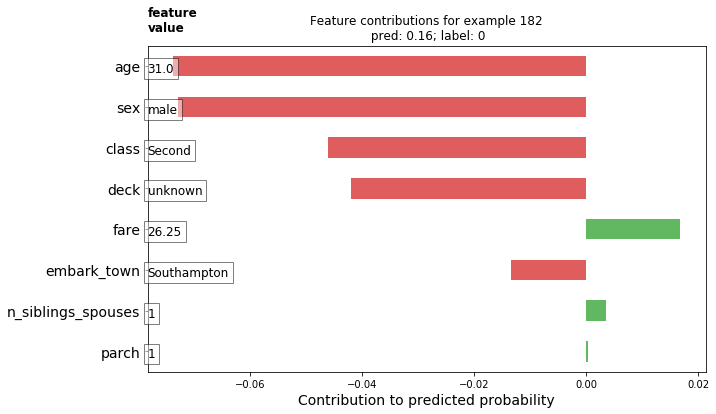

In [57]:
example = df_dfc.iloc[ID]  # Choose IDth example from evaluation set.
ax = plot_example(example)
ax.set_title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'.format(ID, probs[ID], labels[ID]))
ax.set_xlabel('Contribution to predicted probability', size=14);

In [58]:
# Boilerplate plotting code.
def dist_violin_plot(df_dfc, ID):
  # Initialize plot.
  fig, ax = plt.subplots(1, 1, figsize=(10, 6))
  
  # Create example dataframe.
  TOP_N = 8  # View top 8 features.
  example = df_dfc.iloc[ID]
  ix = example.abs().sort_values()[-TOP_N:].index
  example = example[ix]
  example_df = example.to_frame(name='dfc')
  
  # Add contributions of entire distribution.
  parts=ax.violinplot([df_dfc[w] for w in ix],
                 vert=False,
                 showextrema=False,
                 widths=0.7,
                 positions=np.arange(len(ix)))
  face_color = sns_colors[0]
  alpha = 0.15
  for pc in parts['bodies']:
      pc.set_facecolor(face_color)
      pc.set_alpha(alpha)
  
  # Add feature values.
  _add_feature_values(dfeval.iloc[ID][sorted_ix], ax)

  # Add local contributions.
  ax.scatter(example,
              np.arange(example.shape[0]),
              color=sns.color_palette()[2],
              s=100,
              marker="s",
              label='contributions for example')
  
  # Legend
  # Proxy plot, to show violinplot dist on legend.
  ax.plot([0,0], [1,1], label='eval set contributions\ndistributions',
          color=face_color, alpha=alpha, linewidth=10)
  legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large',
                     frameon=True)
  legend.get_frame().set_facecolor('white')
  
  # Format plot.
  ax.set_yticks(np.arange(example.shape[0]))
  ax.set_yticklabels(example.index)
  ax.grid(False, axis='y')
  ax.set_xlabel('Contribution to predicted probability', size=14)

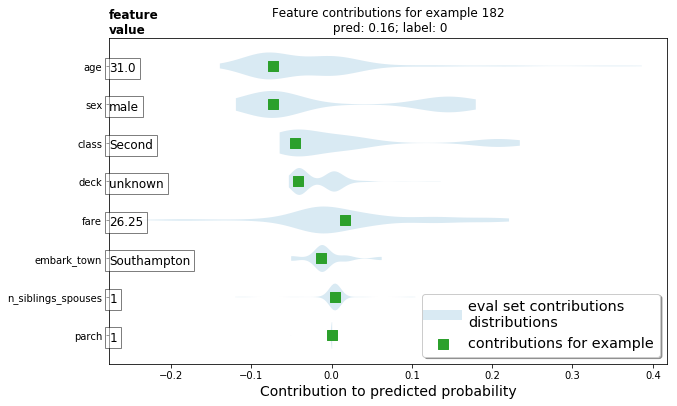

In [59]:
dist_violin_plot(df_dfc, ID)
plt.title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'.format(ID, probs[ID], labels[ID]));

### Global feature importances

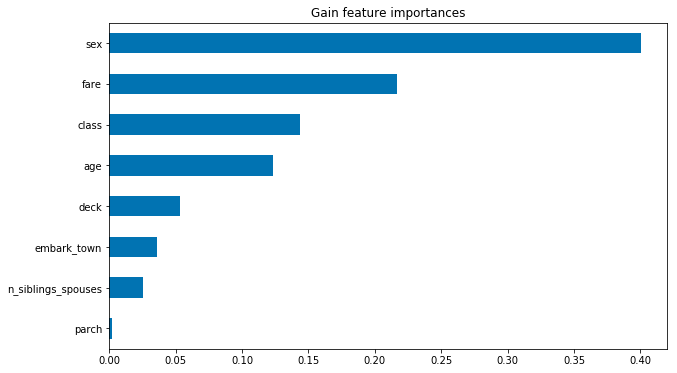

In [60]:
importances = est.experimental_feature_importances(normalize=True)
df_imp = pd.Series(importances)

# Visualize importances.
N = 8
ax = (df_imp.iloc[0:N][::-1]
    .plot(kind='barh',
          color=sns_colors[0],
          title='Gain feature importances',
          figsize=(10, 6)))
ax.grid(False, axis='y')

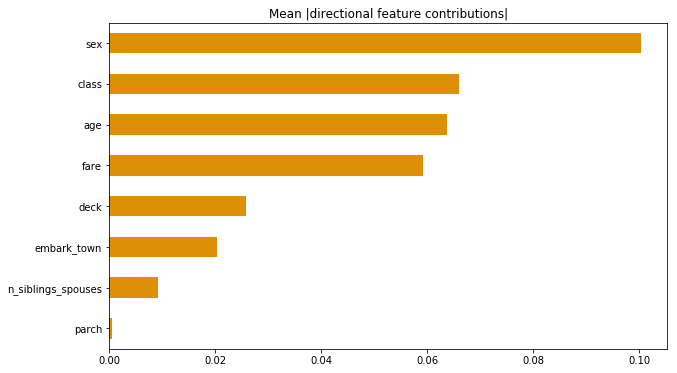

In [61]:
# Plot.
dfc_mean = df_dfc.abs().mean()
N = 8
sorted_ix = dfc_mean.abs().sort_values()[-N:].index  # Average and sort by absolute.
ax = dfc_mean[sorted_ix].plot(kind='barh',
                       color=sns_colors[1],
                       title='Mean |directional feature contributions|',
                       figsize=(10, 6))
ax.grid(False, axis='y')

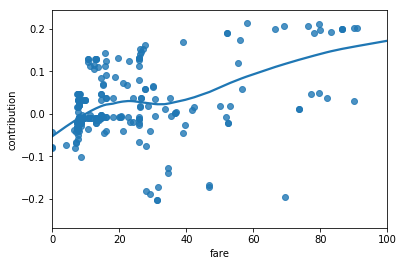

In [62]:
FEATURE = 'fare'
feature = pd.Series(df_dfc[FEATURE].values, index=dfeval[FEATURE].values).sort_index()
ax = sns.regplot(feature.index.values, feature.values, lowess=True);
ax.set_ylabel('contribution')
ax.set_xlabel(FEATURE);
ax.set_xlim(0, 100);

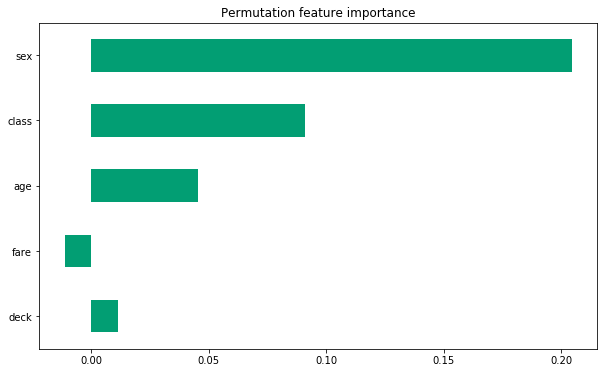

In [63]:
def permutation_importances(est, X_eval, y_eval, metric, features):
    """Column by column, shuffle values and observe effect on eval set.
    
    source: http://explained.ai/rf-importance/index.html
    A similar approach can be done during training. See "Drop-column importance"
    in the above article."""
    baseline = metric(est, X_eval, y_eval)
    imp = []
    for col in features:
        save = X_eval[col].copy()
        X_eval[col] = np.random.permutation(X_eval[col])
        m = metric(est, X_eval, y_eval)
        X_eval[col] = save
        imp.append(baseline - m)
    return np.array(imp)

def accuracy_metric(est, X, y):
    """TensorFlow estimator accuracy."""
    eval_input_fn = make_input_fn(X,
                                  y=y,
                                  shuffle=False,
                                  n_epochs=1)
    return est.evaluate(input_fn=eval_input_fn)['accuracy']
features = CATEGORICAL_COLUMNS + NUMERIC_COLUMNS
importances = permutation_importances(est, dfeval, y_eval, accuracy_metric,
                                      features)
df_imp = pd.Series(importances, index=features)

sorted_ix = df_imp.abs().sort_values().index
ax = df_imp[sorted_ix][-5:].plot(kind='barh', color=sns_colors[2], figsize=(10, 6))
ax.grid(False, axis='y')
ax.set_title('Permutation feature importance');

### Conclusion
In this tutorial you learned how to interpret Boosted Trees models using directional feature contributions and feature importance techniques. These techniques provide insight into how the features impact a model's predictions. Finally, you also gained intution for how a Boosted Tree model fits a complex function by viewing the decision surface for several models.

## 自定义 Estimator
每个 Estimator（无论是预创建还是自定义）的核心都是其__模型函数__，这是一种为训练、评估和预测构建图的方法。如果您使用预创建的 Estimator，则有人已经实现了模型函数。如果您使用自定义 Estimator，则必须自行编写模型函数。随附文档介绍了如何编写模型函数。


